Test with stat_Master file

Bandwidth: 0.2, Silhouette Score: 0.4663599259262865


c:\Users\fionu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Das System kann die angegebene Datei nicht finden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\fionu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\fionu\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fionu\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\fionu\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.C

Bandwidth: 0.24000000000000002, Silhouette Score: 0.5396049136546295
Bandwidth: 0.28, Silhouette Score: 0.5552815256961368
Bandwidth: 0.32000000000000006, Silhouette Score: 0.4916197510796066
Bandwidth: 0.36000000000000004, Silhouette Score: 0.4916197510796066
Bandwidth: 0.4, Silhouette Score: 0.4916197510796066
Bandwidth: 0.44000000000000006, Silhouette Score: 0.33885963160458743
Bandwidth: 0.48000000000000004, Silhouette Score: 0.33885963160458743
Best bandwidth: 0.28 with Silhouette Score: 0.5552815256961368


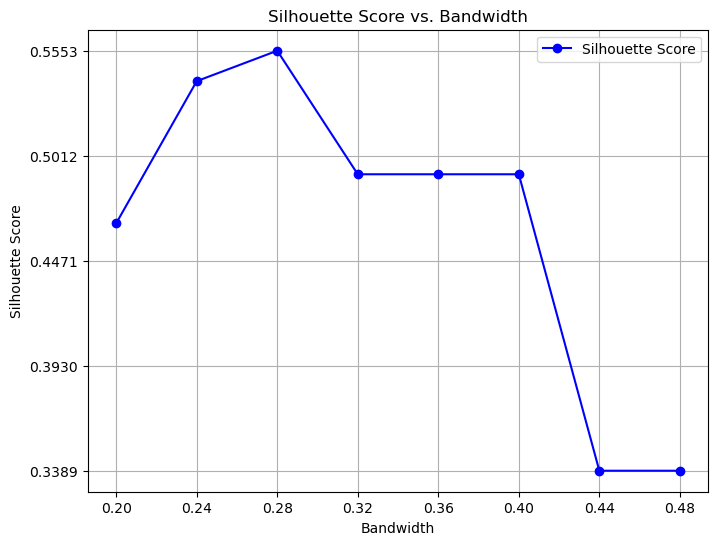

Cluster Centers: [[ 1.36288579e+01  1.90270698e+01  2.23944186e-02]
 [ 6.95315609e+00  1.21222659e+02  6.42401372e-01]
 [ 6.08612613e+00 -2.87977928e+01  6.74065315e-01]
 [ 2.15968750e+00  8.99331250e+01  2.16343750e-02]
 [ 1.83400000e+01  4.70881818e+01  6.86581818e-01]
 [ 2.30000000e-01 -1.60300000e+02  4.80000000e-02]
 [ 1.73200000e+01  1.66210000e+02  6.70500000e-01]]


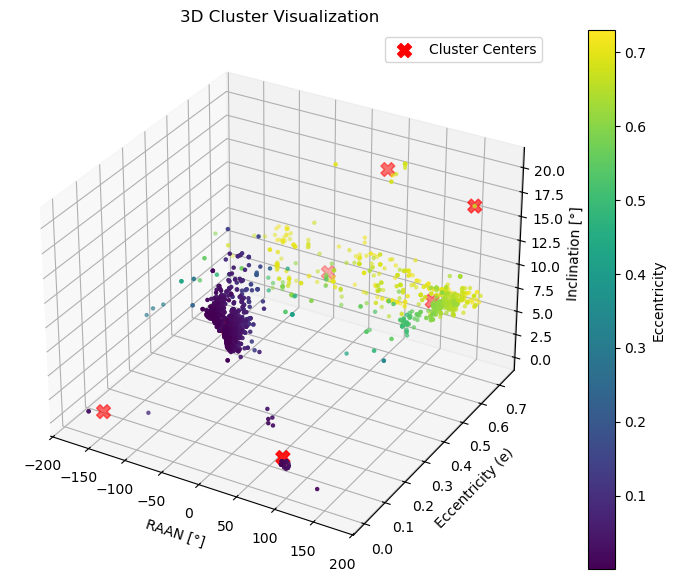

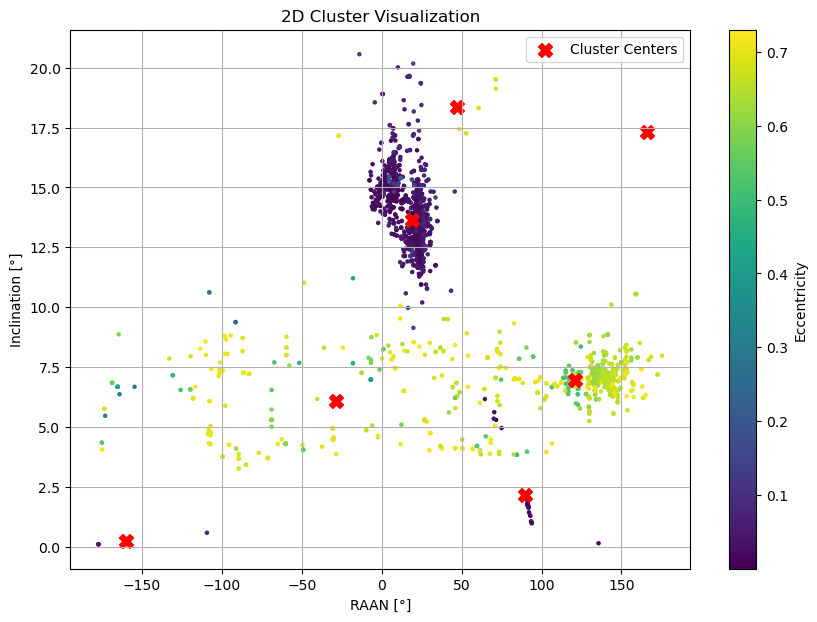

In [ ]:
import cluster_finder
import numpy as np
from cluster_plotter import ClusterPlotter

testfile = r"input\stat_Master_02_geo_s1.crs"
data = cluster_finder.prepare_data_for_clustering(testfile)  # data is a named tuple (inc, raan, ecc)

bandwidths = np.arange(0.2, 0.5, 0.04)
best_bandwidth, scores = cluster_finder.find_best_bandwidth(data, bandwidths)
cluster_finder.plot_bandwidth_against_score(bandwidths, scores)

cluster_data = cluster_finder.find_clusters_mean_shift_clustering(data, best_bandwidth)
data = cluster_data.data 
labels = cluster_data.labels
cluster_centers = cluster_data.cluster_centers

print("Cluster Centers:", cluster_centers)

plotter = ClusterPlotter(data, labels, cluster_centers)
plotter.clusters_3d_plot("3D Cluster Visualization")
plotter.clusters_2d_plot("2D Cluster Visualization")

Main results for small data set 5mm

2002 geo
Bandwidth: 0.2, Silhouette Score: 0.3855328177458831
Bandwidth: 0.25, Silhouette Score: 0.5130814660965503
Bandwidth: 0.3, Silhouette Score: 0.5417155015594003
Bandwidth: 0.35, Silhouette Score: 0.5318661687895904
Bandwidth: 0.4, Silhouette Score: 0.2716892245928157
Best bandwidth: 0.3 with Silhouette Score: 0.5417155015594003
Bandwidth: 0.2, Silhouette Score: 0.4663599259262865
Bandwidth: 0.25, Silhouette Score: 0.5449069978131782
Bandwidth: 0.3, Silhouette Score: 0.5011749869927314
Bandwidth: 0.35, Silhouette Score: 0.4916197510796066
Bandwidth: 0.4, Silhouette Score: 0.4916197510796066
Best bandwidth: 0.25 with Silhouette Score: 0.5449069978131782
Updated 10cm Cluster Data with 5mm Cluster Labels:
[[ 0.0000e+00  1.3520e+01 -2.2300e+00  3.5900e-02  0.0000e+00]
 [ 0.0000e+00  1.4090e+01  5.6600e+00  2.0900e-02  0.0000e+00]
 [ 0.0000e+00  1.4090e+01  5.6600e+00  2.0900e-02  0.0000e+00]
 ...
 [ 6.0000e+00  1.1000e-01 -1.7727e+02  3.5600e-02  4.0000e+00]
 [ 6.0000e+00  1.1000e-0

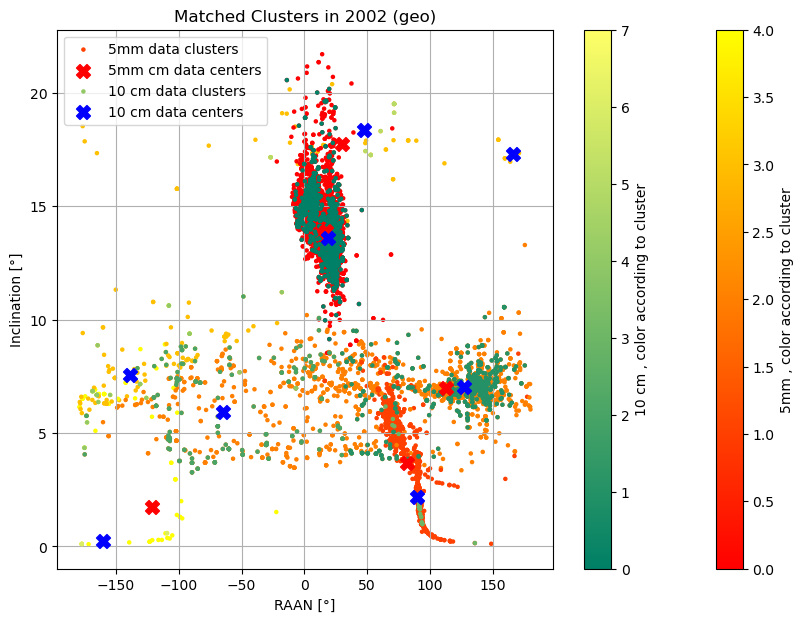

2003 geo
Bandwidth: 0.2, Silhouette Score: 0.5128959364919529
Bandwidth: 0.25, Silhouette Score: 0.5160509554837521
Bandwidth: 0.3, Silhouette Score: 0.51427414619738
Bandwidth: 0.35, Silhouette Score: 0.4075150925858676


In [ ]:
import cluster_finder
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from cluster_plotter import ClusterPlotter  # Assuming your plotting module is saved as cluster_plotter.py

seed = 1
years = ["2002", "2003", "2004", "2005"]
orbit_types = ["geo", "gto", "fol"]

cluster_evolution = {}
updated_10cm_cluster_evolution = {}

cluster_centers_5mm_dict = {}
cluster_centers_10cm_dict = {}
matches_dict = {}  # Store matched clusters

bandwidths = [0.2, 0.25, 0.3, 0.35, 0.4]
for orbit_type in orbit_types: 
    for year in years: 
        print(year, orbit_type)
        file_5mm, file_10cm = cluster_finder.get_files_for_cluster_evolution(year, orbit_type, seed, 5,  "input")
        clusters_5mm, clusters_10cm, clusters_5mm_array, clusters_10cm_array = cluster_finder.find_clusters_for_one_year(file_5mm, file_10cm, bandwidths)
                
        # Add clusters to the evolution dictionary
        cluster_evolution[(year, orbit_type, seed)] = {
            "clusters_5mm": clusters_5mm,
            "clusters_10cm": clusters_10cm
        }
        
        # Compare clusters and store updated data
        updated_10cm_cluster_data = cluster_finder.cluster_comparison(clusters_5mm_array, clusters_10cm_array)
        updated_10cm_cluster_evolution[(year, orbit_type, seed)] = updated_10cm_cluster_data

        # Get cluster centers
        clusters_center_5mm = clusters_5mm.cluster_centers
        clusters_center_10cm = clusters_10cm.cluster_centers

        # Match clusters using Hungarian algorithm
        matches, unmatched_10cm, unmatched_5mm = cluster_finder.match_clusters(clusters_center_10cm, clusters_center_5mm)
        matches_dict[(year, orbit_type, seed)] = matches

        # Store cluster centers for plotting
        cluster_centers_5mm_dict[(year, orbit_type, seed)] = clusters_center_5mm
        cluster_centers_10cm_dict[(year, orbit_type, seed)] = clusters_center_10cm

        # Visualize matched clusters
        plotter_5mm = ClusterPlotter(clusters_5mm.data, clusters_5mm.labels, clusters_5mm.cluster_centers)
        plotter_5mm.combined_clusters_2d_plot(
            clusters_10cm.data, clusters_10cm.labels, clusters_center_10cm,
            title=f"Matched Clusters in {year} ({orbit_type})", size_in_mm=5
        )

cluster_finder.plot_cluster_center_evolution(cluster_centers_5mm_dict, cluster_centers_10cm_dict)
cluster_finder.plot_cluster_center_evolution_2d(cluster_centers_5mm_dict, cluster_centers_10cm_dict)

1mm data

2002 geo
Bandwidth: 0.2, Silhouette Score: 0.3684520824706648
Best bandwidth: 0.2 with Silhouette Score: 0.3684520824706648
Bandwidth: 0.2, Silhouette Score: 0.4663599259262865
Best bandwidth: 0.2 with Silhouette Score: 0.4663599259262865
Updated 10cm Cluster Data with 5mm Cluster Labels:
[[ 0.0000e+00  1.3520e+01 -2.2300e+00  3.5900e-02  0.0000e+00]
 [ 0.0000e+00  1.4090e+01  5.6600e+00  2.0900e-02  0.0000e+00]
 [ 0.0000e+00  1.4090e+01  5.6600e+00  2.0900e-02  0.0000e+00]
 ...
 [ 9.0000e+00  3.8400e+00  8.4600e+01  4.8560e-01  2.0000e+00]
 [ 1.0000e+01  1.7320e+01  1.6621e+02  6.7050e-01  6.0000e+00]
 [ 1.1000e+01  5.9000e-01 -1.0939e+02  8.5200e-02  4.0000e+00]]
Number of unmatched 10cm elements: 0
Number of rows where the first and last columns do not match: 838
Total number of rows: 2788
Mismatch percentage: 30.06%


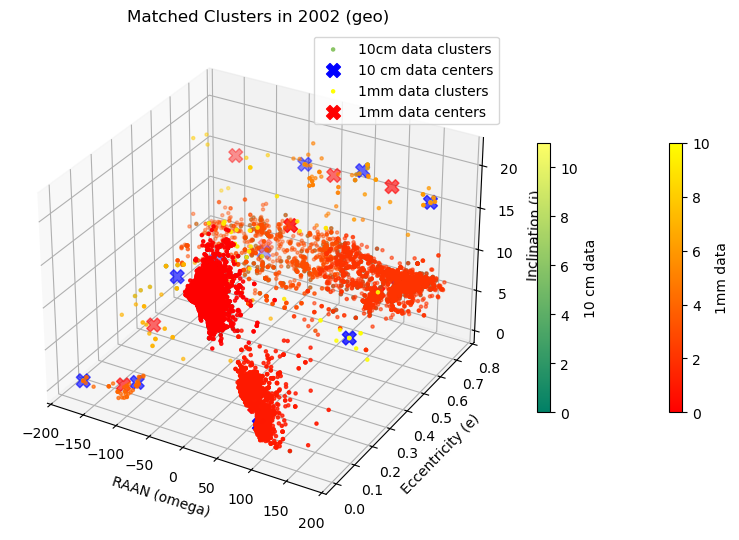

2003 geo
Bandwidth: 0.2, Silhouette Score: 0.5124551517133362
Best bandwidth: 0.2 with Silhouette Score: 0.5124551517133362
Bandwidth: 0.2, Silhouette Score: 0.10153133862496591
Best bandwidth: 0.2 with Silhouette Score: 0.10153133862496591
Updated 10cm Cluster Data with 5mm Cluster Labels:
[[ 0.0000e+00  1.0630e+01 -3.3160e+01  4.9600e-02  0.0000e+00]
 [ 0.0000e+00  1.1460e+01 -2.4190e+01  5.9300e-02  0.0000e+00]
 [ 0.0000e+00  1.1460e+01 -2.4190e+01  5.9300e-02  0.0000e+00]
 ...
 [ 1.0000e+01  6.6700e+00  1.6989e+02  4.4370e-01  2.0000e+00]
 [ 1.0000e+01  6.6700e+00  1.6989e+02  4.4370e-01  2.0000e+00]
 [ 1.1000e+01  1.8410e+01 -1.5345e+02  6.7040e-01  7.0000e+00]]
Number of unmatched 10cm elements: 0
Number of rows where the first and last columns do not match: 789
Total number of rows: 2726
Mismatch percentage: 28.94%


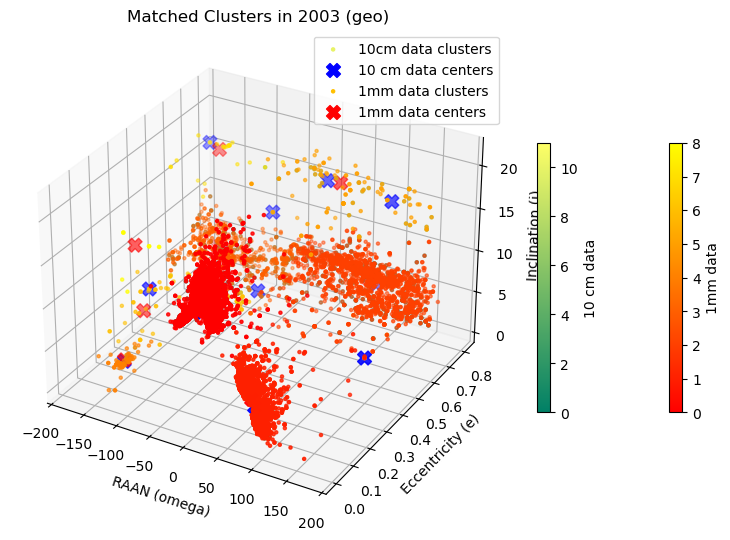

2004 geo
Bandwidth: 0.2, Silhouette Score: 0.21793735467688594
Best bandwidth: 0.2 with Silhouette Score: 0.21793735467688594
Bandwidth: 0.2, Silhouette Score: 0.02415660752575286
Best bandwidth: 0.2 with Silhouette Score: 0.02415660752575286
Updated 10cm Cluster Data with 5mm Cluster Labels:
[[  0.      10.89   -33.45     0.076    0.    ]
 [  0.      11.01   -29.64     0.0592   0.    ]
 [  0.      10.47   -35.84     0.0669   0.    ]
 ...
 [ 11.      15.36    11.99     0.2413  10.    ]
 [ 11.      15.73    11.99     0.2412  10.    ]
 [ 11.      15.63    11.99     0.2412  10.    ]]
Number of unmatched 10cm elements: 0
Number of rows where the first and last columns do not match: 463
Total number of rows: 2721
Mismatch percentage: 17.02%


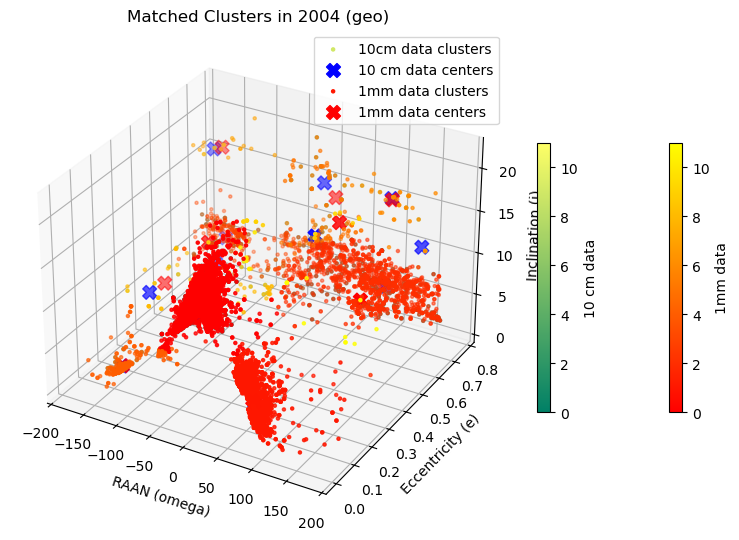

2005 geo
Bandwidth: 0.2, Silhouette Score: 0.22256762893581428
Best bandwidth: 0.2 with Silhouette Score: 0.22256762893581428
Bandwidth: 0.2, Silhouette Score: -0.3293753046379442
Best bandwidth: 0.2 with Silhouette Score: -0.3293753046379442
Updated 10cm Cluster Data with 5mm Cluster Labels:
[[ 0.000e+00  1.037e+01 -3.943e+01  7.610e-02  0.000e+00]
 [ 0.000e+00  1.037e+01 -3.943e+01  7.610e-02  0.000e+00]
 [ 0.000e+00  9.900e+00 -4.805e+01  9.760e-02  0.000e+00]
 ...
 [ 9.000e+00  1.996e+01  3.460e+00  6.753e-01  8.000e+00]
 [ 1.000e+01  1.800e+01 -8.566e+01  3.257e-01  9.000e+00]
 [ 1.200e+01  1.252e+01  1.838e+01  4.494e-01  8.000e+00]]
Number of unmatched 10cm elements: 1223
Number of rows where the first and last columns do not match: 161
Total number of rows: 1461
Mismatch percentage: 11.02%


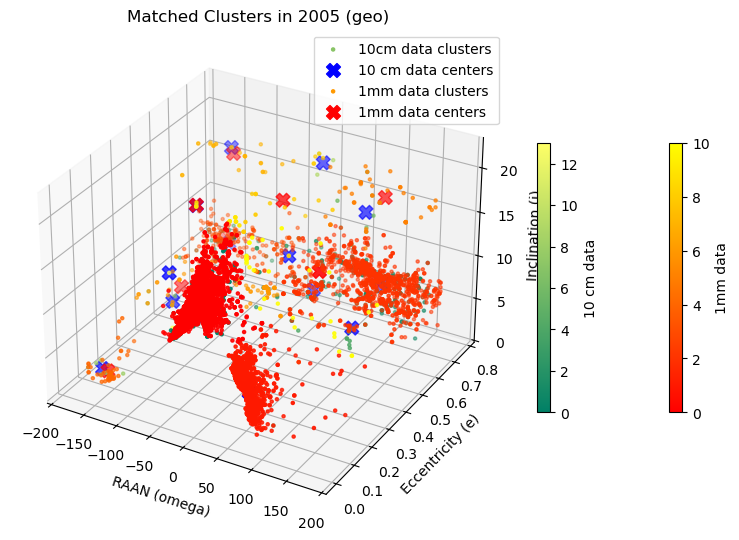

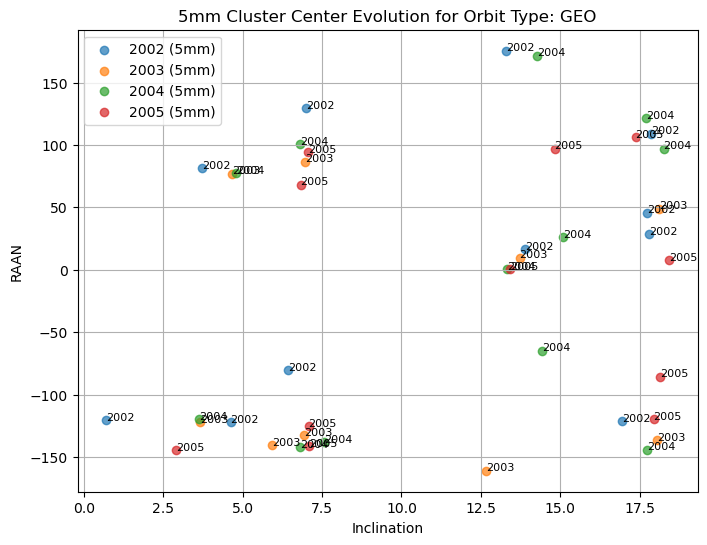

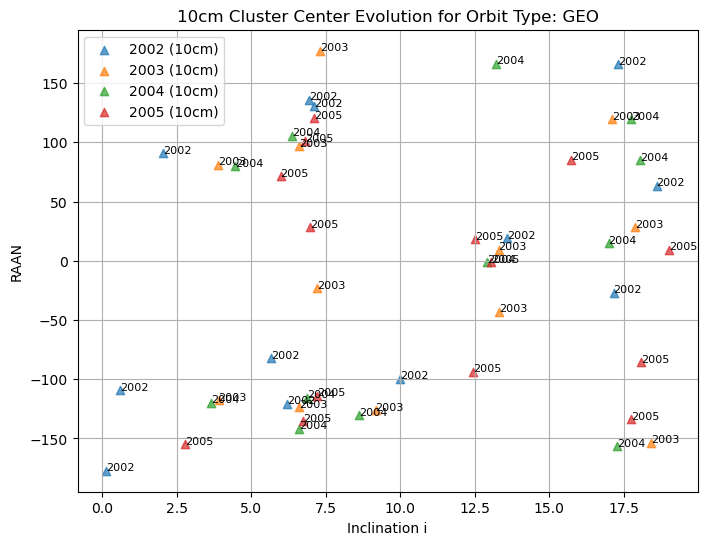

In [54]:
import cluster_finder
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from cluster_plotter import ClusterPlotter  # Assuming your plotting module is saved as cluster_plotter.py

seed = 1
years = ["2002", "2003", "2004", "2005"]
#years = np.arange(2002, 2023)
orbit_types = ["geo"] #, "gto", "fol"]

cluster_evolution = {}
updated_10cm_cluster_evolution = {}

cluster_centers_1mm_dict = {}
cluster_centers_10cm_dict = {}
matches_dict = {}  # Store matched clusters

bandwidths = [0.2]#, 0.25, 0.3, 0.4]
for orbit_type in orbit_types: 
    for year in years: 
        print(year, orbit_type)
        file_1mm, file_10cm = cluster_finder.get_files_for_cluster_evolution(year, orbit_type, seed, 1,  "input")
        clusters_1mm, clusters_10cm, clusters_1mm_array, clusters_10cm_array = cluster_finder.find_clusters_for_one_year(file_1mm, file_10cm, bandwidths)
                
        # Add clusters to the evolution dictionary
        cluster_evolution[(year, orbit_type, seed)] = {
            "clusters_1mm": clusters_1mm,
            "clusters_10cm": clusters_10cm
        }
        
        # Compare clusters and store updated data
        updated_10cm_cluster_data = cluster_finder.cluster_comparison(clusters_1mm_array, clusters_10cm_array)
        updated_10cm_cluster_evolution[(year, orbit_type, seed)] = updated_10cm_cluster_data

        # Get cluster centers
        clusters_center_1mm = clusters_1mm.cluster_centers
        clusters_center_10cm = clusters_10cm.cluster_centers

        # Match clusters using Hungarian algorithm
        matches, unmatched_10cm, unmatched_1mm = cluster_finder.match_clusters(clusters_center_10cm, clusters_center_1mm)
        matches_dict[(year, orbit_type, seed)] = matches

        # Store cluster centers for plotting
        cluster_centers_1mm_dict[(year, orbit_type, seed)] = clusters_center_1mm
        cluster_centers_10cm_dict[(year, orbit_type, seed)] = clusters_center_10cm

        # Visualize matched clusters
        plotter_1mm = ClusterPlotter(clusters_1mm.data, clusters_1mm.labels, clusters_1mm.cluster_centers)
        plotter_1mm.combined_clusters_2d_plot(
            clusters_10cm.data, clusters_10cm.labels, clusters_center_10cm,
            f"Matched Clusters in {year} ({orbit_type})", 1
        )

        plotter_1mm = ClusterPlotter(clusters_1mm.data, clusters_1mm.labels, clusters_1mm.cluster_centers)
        plotter_1mm.combined_clusters_3d_plot(
            clusters_10cm.data, clusters_10cm.labels, clusters_center_10cm,
            f"Matched Clusters in {year} ({orbit_type})", 1
        )
        
cluster_finder.plot_cluster_center_evolution_2d(cluster_centers_1mm_dict, cluster_centers_10cm_dict)

### Binning data in four year packages, 5mm for more speed

In [2]:
import cluster_finder
import numpy as np
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from cluster_plotter import ClusterPlotter  # Assuming your plotting module is saved as cluster_plotter.py
from getdata import PopulationType, data_for_one_year_one_seed

seed = 1
year_ranges = [np.arange(2002, 2006), np.arange(2006, 2011), np.arange(2011, 2014), np.arange(2014, 2020), np.arange(2020, 2024)] 
#np.arange includes start, excludes stop
orbit_types = ["geo", "gto", "fol"]

cluster_evolution = {}
updated_10cm_cluster_evolution = {}

cluster_centers_5mm_dict = {}
cluster_centers_10cm_dict = {}
matches_dict = {}  # Store matched clusters

bandwidths = [0.2, 0.25, 0.3, 0.35, 0.4]
for orbit_type in orbit_types: 
    for year_range in year_ranges: 
        print(year_range, orbit_type)
        #file_5mm, file_10cm = cluster_finder.get_files_for_cluster_evolution(year, orbit_type, seed, 5,  "input")
        clusters_5mm, clusters_10cm, clusters_5mm_array, clusters_10cm_array = cluster_finder.find_clusters_for_multiple_years(year_range, 1, bandwidths, orbit_type, seed)
                
        # Add clusters to the evolution dictionary
        cluster_evolution[(year_range, orbit_type, seed)] = {
            "clusters_5mm": clusters_5mm,
            "clusters_10cm": clusters_10cm
        }
        
        # Compare clusters and store updated data
        updated_10cm_cluster_data = cluster_finder.cluster_comparison(clusters_5mm_array, clusters_10cm_array)
        updated_10cm_cluster_evolution[(year_range, orbit_type, seed)] = updated_10cm_cluster_data

        # Get cluster centers
        clusters_center_5mm = clusters_5mm.cluster_centers
        clusters_center_10cm = clusters_10cm.cluster_centers

        # Match clusters using Hungarian algorithm
        matches, unmatched_10cm, unmatched_5mm = cluster_finder.match_clusters(clusters_center_10cm, clusters_center_5mm)
        matches_dict[(year_range, orbit_type, seed)] = matches

        # Store cluster centers for plotting
        cluster_centers_5mm_dict[(year_range, orbit_type, seed)] = clusters_center_5mm
        cluster_centers_10cm_dict[(year_range, orbit_type, seed)] = clusters_center_10cm

        # Visualize matched clusters
        plotter_5mm = ClusterPlotter(clusters_5mm.data, clusters_5mm.labels, clusters_5mm.cluster_centers)
        plotter_5mm.combined_clusters_2d_plot(
            clusters_10cm.data, clusters_10cm.labels, clusters_center_10cm,
            title=f"Matched Clusters in {year_range} ({orbit_type})",size_in_mm = 5)

cluster_finder.plot_cluster_center_evolution(cluster_centers_5mm_dict, cluster_centers_10cm_dict)
cluster_finder.plot_cluster_center_evolution_2d(cluster_centers_5mm_dict, cluster_centers_10cm_dict)

[2002 2003 2004 2005] geo
2002
Bandwidth: 0.2, Silhouette Score: 0.3684520824706648
Bandwidth: 0.25, Silhouette Score: 0.5135164282059655
Bandwidth: 0.3, Silhouette Score: 0.5470385106960334
Bandwidth: 0.35, Silhouette Score: 0.43557244264233685
Bandwidth: 0.4, Silhouette Score: 0.2464551934895472
Best bandwidth: 0.3 with Silhouette Score: 0.5470385106960334
Bandwidth: 0.2, Silhouette Score: 0.4663599259262865
Bandwidth: 0.25, Silhouette Score: 0.5449069978131782
Bandwidth: 0.3, Silhouette Score: 0.5011749869927314
Bandwidth: 0.35, Silhouette Score: 0.4916197510796066
Bandwidth: 0.4, Silhouette Score: 0.4916197510796066
Best bandwidth: 0.25 with Silhouette Score: 0.5449069978131782
2003
Bandwidth: 0.2, Silhouette Score: 0.5124551517133362
Bandwidth: 0.25, Silhouette Score: 0.5271460668125936
Bandwidth: 0.3, Silhouette Score: 0.5247122674753251
Bandwidth: 0.35, Silhouette Score: 0.3161790272124613
Bandwidth: 0.4, Silhouette Score: 0.07348726387304233
Best bandwidth: 0.25 with Silhouette

TypeError: unhashable type: 'numpy.ndarray'

IndexError: list index out of range

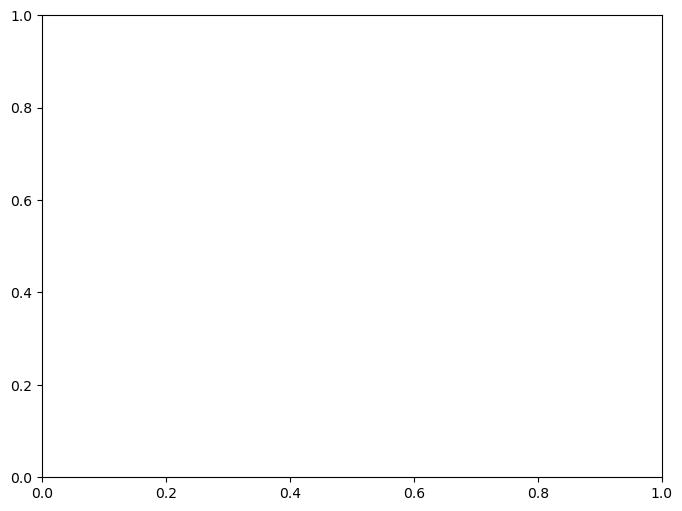

In [59]:
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np  # Ensure you import numpy for array handling
import calculations

from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np



cluster_finder.plot_cluster_center_evolution_2d_with_distance(cluster_centers_1mm_dict, cluster_centers_10cm_dict)


### Crazy vectorfield idea

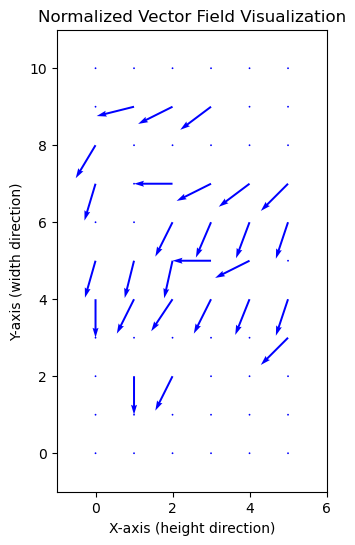

In [23]:
import matplotlib.pyplot as plt

#manually creating the vector field
vector_field = np.zeros((6, 11, 2))
#height of vector field (y direction): (0,0) to (0, 11)
#width (x direction): (0,0) to (5,0)

vector_field[3, 0] = [4, 0]
vector_field[4, 0] = [5, 0]
vector_field[5, 0] = [4, 1]

vector_field[1, 1] = [0, 0]
vector_field[2, 1] = [1, 1]
vector_field[3, 1] = [2, 1]
vector_field[4, 1] = [4, 2]
vector_field[5, 1] = [4, 2]

vector_field[1, 2] = [0, 2]
vector_field[2, 2] = [0, 2]
vector_field[4, 2] = [4, 3]
vector_field[5, 2] = [4, 3]

vector_field[1, 3] = [1, 2]
vector_field[2, 3] = [1, 2]
vector_field[4, 3] = [4, 4]

vector_field[2, 4] = [2, 3]
vector_field[4, 4] = [3, 5]

vector_field[2, 5] = [2, 4]
vector_field[3, 5] = [3, 6]

vector_field[2, 6] = [2, 5]
vector_field[3, 6] = [3, 7]

vector_field[2, 7] = [2, 6]
vector_field[3, 7] = [3, 8]

vector_field[2, 8] = [2, 7]
vector_field[3, 8] = [3, 9]

vector_field[2, 9] = [2, 8]
vector_field[3, 9] = [3, 10]

vector_field[2, 10] = [2,9 ]


# Normalize the vectors in the field
def normalize_vectors(vectors):
    # Calculate the norm of each vector
    norms = np.linalg.norm(vectors, axis=-1, keepdims=True)
    # Avoid division by zero by replacing zero norms with ones
    norms[norms == 0] = 1
    # Normalize the vectors
    return vectors / norms

normalized_vector_field = normalize_vectors(-vector_field)

# Create meshgrid for coordinates (positions of the arrows)
X, Y = np.meshgrid(np.arange(normalized_vector_field.shape[0]), np.arange(normalized_vector_field.shape[1]))

# Extract the normalized vector components
U = normalized_vector_field[:, :, 0]  # x-components of the vectors
V = normalized_vector_field[:, :, 1]  # y-components of the vectors

# Create a quiver plot to visualize the normalized vector field
plt.figure(figsize=(10, 6))
plt.quiver(X, Y, U, V, scale=1, angles='xy', scale_units='xy', color='blue')

# Customize the plot
plt.xlim(-1, normalized_vector_field.shape[0])
plt.ylim(-1, normalized_vector_field.shape[1])
plt.gca().set_aspect('equal', adjustable='box')  # Keep aspect ratio equal
plt.title("Normalized Vector Field Visualization")
plt.xlabel("X-axis (height direction)")
plt.ylabel("Y-axis (width direction)")

# Show the plot
plt.show()

In [1]:
import cluster_finder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from cluster_plotter import ClusterPlotter

data_5mm = r"input\small_Master_02_geo_s1.crs" #crossing data for objects larger than 5mm
data_5mm = cluster_finder.prepare_data_for_clustering(data_5mm)

bandwidths =  [0.3] #np.arange(0.2, 0.5, 0.05)#bandwidths to find
best_bandwidth_5mm, scores_5mm = cluster_finder.find_best_bandwidth(data_5mm, bandwidths)
clusters_5mm = cluster_finder.find_clusters_mean_shift_clustering(data_5mm, best_bandwidth_5mm)

cluster_data_5mm = clusters_5mm.data
labels_5mm = clusters_5mm.labels
cluster_centers_5mm = clusters_5mm.cluster_centers

data_10cm = r"input\stat_Master_02_geo_s1.crs" #crossing data for objects larger than 10cm
data_10cm = cluster_finder.prepare_data_for_clustering(data_10cm)

best_bandwidth_10cm, scores_10cm = cluster_finder.find_best_bandwidth(data_10cm, bandwidths)
clusters_10cm = cluster_finder.find_clusters_mean_shift_clustering(data_10cm, best_bandwidth_10cm)

cluster_data_10cm = clusters_10cm.data
labels_10cm = clusters_10cm.labels
cluster_centers_10cm = clusters_10cm.cluster_centers

#store clusters for both datasets in numpy array
clusters_5mm = cluster_finder.store_clusters(cluster_data_5mm, labels_5mm)
clusters_10cm = cluster_finder.store_clusters(cluster_data_10cm, labels_10cm)
#print the number of clusters for both datasets
print(f"5mm dataset clusters: {len(clusters_5mm)}")
print(f"10cm dataset clusters: {len(clusters_10cm)}")

#convert clusters to array
clusters_5mm_array = cluster_finder.convert_clusters_to_array(clusters_5mm)
clusters_10cm_array = cluster_finder.convert_clusters_to_array(clusters_10cm)

updated_10cm_cluster_data = []
total_10cm_elements = sum([len(elements) for elements in clusters_10cm.values()])
total_5mm_elements = sum([len(elements) for elements in clusters_5mm.values()])
print(f"Total 10cm Cluster Elements: {total_10cm_elements}")
print(f"Total 5mm Cluster Elements: {total_5mm_elements}")

count = 0 #count number of matches

data_10cm = clusters_10cm_array[:, 1:]  #only the inc, raan, ecc, cluster label is removed
data_5mm = clusters_5mm_array[:, 1:]

print(len(data_10cm[0]))
print(len(data_5mm[0]))
for row_index, row_10cm in enumerate(data_10cm):  # Iterate over rows in the 10cm dataset
    matched = False
    matches = np.all(np.isclose(data_5mm, row_10cm, atol=1e-20), axis=1) #tolerance to 10e-20 is the way to go
    
    if np.any(matches):
        matched_indices = np.where(matches)[0]
        for idx in matched_indices:
            matched_row = clusters_5mm_array[idx]
            updated_10cm_cluster_data.append(
                [clusters_10cm_array[row_index, 0]] + list(row_10cm) + [matched_row[0]]
            )
            matched = True
            break  # Stop searching once the first match is found

    if not matched:
        count += 1

updated_10cm_cluster_data = np.array(updated_10cm_cluster_data)

print("Updated 10cm Cluster Data with 5mm Cluster Labels:")
print(updated_10cm_cluster_data)
print(f"Number of unmatched 10cm elements: {count}")#should be zero

first_column = updated_10cm_cluster_data[:, 0]  # First column: 10cm cluster labels
last_column = updated_10cm_cluster_data[:, -1]  # Last column: 5mm cluster labels
mismatches = first_column != last_column
num_mismatches = np.sum(mismatches)
print(f"Number of rows where the first and last columns do not match: {num_mismatches}")
print(f"Total number of rows: {updated_10cm_cluster_data.shape[0]}")
print(f"Mismatch percentage: {num_mismatches / updated_10cm_cluster_data.shape[0] * 100:.2f}%")

"""# Plotting for the 5mm dataset
plotter_5mm = ClusterPlotter(cluster_data_5mm, labels_5mm, cluster_centers_5mm)
plotter_5mm.clusters_3d_plot("3D Cluster Visualization for 5mm Data")
plotter_5mm.clusters_2d_plot("2D Cluster Visualization for 5mm Data")

# Plotting for the 10cm dataset
plotter_10cm = ClusterPlotter(cluster_data_10cm, labels_10cm, cluster_centers_10cm)
plotter_10cm.clusters_3d_plot("3D Cluster Visualization for 10cm Data")
plotter_10cm.clusters_2d_plot("2D Cluster Visualization for 10cm Data")"""

Bandwidth: 0.3, Silhouette Score: 0.5417155015594003
Best bandwidth: 0.3 with Silhouette Score: 0.5417155015594003
Bandwidth: 0.3, Silhouette Score: 0.5011749869927314
Best bandwidth: 0.3 with Silhouette Score: 0.5011749869927314
5mm dataset clusters: 5
10cm dataset clusters: 5
Total 10cm Cluster Elements: 2788
Total 5mm Cluster Elements: 11089
3
3
Updated 10cm Cluster Data with 5mm Cluster Labels:
[[ 0.0000e+00  1.3520e+01 -2.2300e+00  3.5900e-02  0.0000e+00]
 [ 0.0000e+00  1.4090e+01  5.6600e+00  2.0900e-02  0.0000e+00]
 [ 0.0000e+00  1.4090e+01  5.6600e+00  2.0900e-02  0.0000e+00]
 ...
 [ 4.0000e+00  1.1000e-01 -1.7727e+02  3.5600e-02  4.0000e+00]
 [ 4.0000e+00  1.1000e-01 -1.7727e+02  3.5600e-02  4.0000e+00]
 [ 4.0000e+00  1.1000e-01 -1.7727e+02  3.5600e-02  4.0000e+00]]
Number of unmatched 10cm elements: 0
Number of rows where the first and last columns do not match: 803
Total number of rows: 2788
Mismatch percentage: 28.80%


'# Plotting for the 5mm dataset\nplotter_5mm = ClusterPlotter(cluster_data_5mm, labels_5mm, cluster_centers_5mm)\nplotter_5mm.clusters_3d_plot("3D Cluster Visualization for 5mm Data")\nplotter_5mm.clusters_2d_plot("2D Cluster Visualization for 5mm Data")\n\n# Plotting for the 10cm dataset\nplotter_10cm = ClusterPlotter(cluster_data_10cm, labels_10cm, cluster_centers_10cm)\nplotter_10cm.clusters_3d_plot("3D Cluster Visualization for 10cm Data")\nplotter_10cm.clusters_2d_plot("2D Cluster Visualization for 10cm Data")'

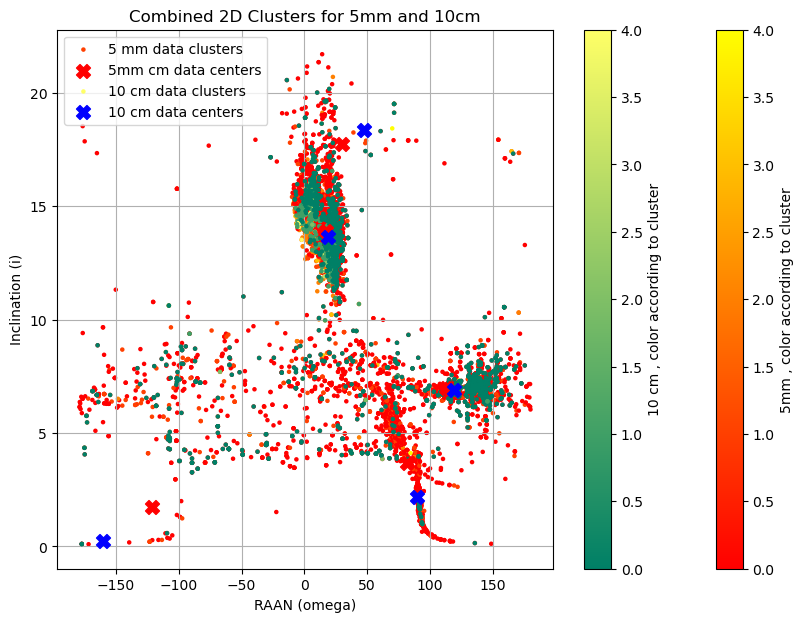

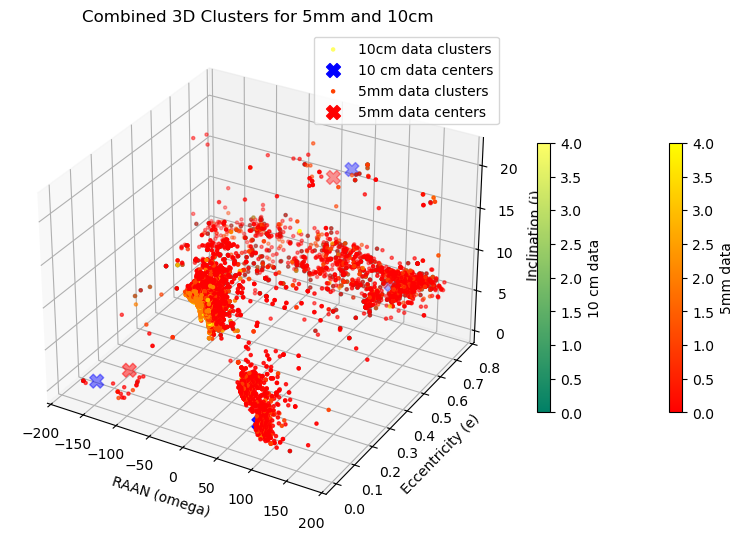

In [ ]:
plotter_5mm = ClusterPlotter(data_5mm, labels_5mm, cluster_centers_5mm)

# Call combined 2D plot
plotter_5mm.combined_clusters_2d_plot(data_10cm, labels_10cm, cluster_centers_10cm,
                                      title="Combined 2D Clusters for 5mm and 10cm", 5)

# Call combined 3D plot
plotter_5mm.combined_clusters_3d_plot(data_10cm, labels_10cm, cluster_centers_10cm,
                                      title="Combined 3D Clusters for 5mm and 10cm", 5)


## Proof of Concept, it seems to work

Cluster labels: [1 0 3 0 2 0 2 1 7 0 1 1 1 1 1 2 3 7 1 2 1 1 1 1 9 0 1 2 1 1 0 3 1 1 2 0 1
 1 3 3 2 0 7 2 1 2 1 1 0 0 1 0 0 1 1 3 0 0 1 2 1 1 2 0 9 0 5 3 0 1 0 2 2 1
 7 0 3 1 1 1 1 2 8 2 2 5 3 0 0 1 1 8 0 1 0 2 0 0 2 0 0 1 1 1 2 1 1 9 2 2 7
 0 1 0 0 0 1 2 0 1 0 1 1 1 0 1 7 0 0 1 2 0 9 0 0 2 0 2 1 1 1 1 3 0 3 0 1 0
 0 0 0 0 1 0 0 0 0 2 1 1 1 0 1 1 8 2 2 0 1 2 0 1 0 8 2 0 1 1 3 2 2 0 0 0 5
 2 0 9 1 5 1 4 0 1 0 0 2 0 2 2 3 0 1 0 2 0 7 4 1 1 3 3 4 1 0 0 2 0 0 1 3 2
 1 2 0 1 3 1 1 1 3 1 1 1 1 0 2 1 0 2 9 3 1 2 3 1 0 0 0 1 1 1 2 0 0 1 2 1 0
 2 2 1 2 2 0 2 1 1 3 1 1 8 0 0 1 2 2 7 1 1 2 2 1 0 2 5 2 9 0 0 2 0 1 7 3 1
 0 0 1 1 1 3 0 1 0 0 9 1 0 1 0 6 1 0 0 0 4 1 1 7 2 0 3 0 0 0 3 2 0 1 0 3 2
 3 1 1 1 1 1 1 0 4 0 1 2 0 2 0 2 2 1 1 0 0 0 0 1 1 3 3 2 2 0 0 1 1 9 2 0 0
 0 0 0 2 0 1 0 1 0 3 0 2 3 2 1 0 0 3 1 0 0 1 1 1 0 2 2 0 1 2 0 1 0 1 0 2 0
 2 9 2 2 3 3 0 0 1 1 2 0 3 2 1 1 3 2 0 0 2 2 0 0 0 0 3 3 0 0 1 0 1 2 4 3 2
 2 1 2 0 0 2 1 1 1 4 3 3 1 2 2 1 0 1 0 0 0 0 1 0 2 0 1 0 2 2 1 0 4 0 0 1 0
 1 0 2 0 

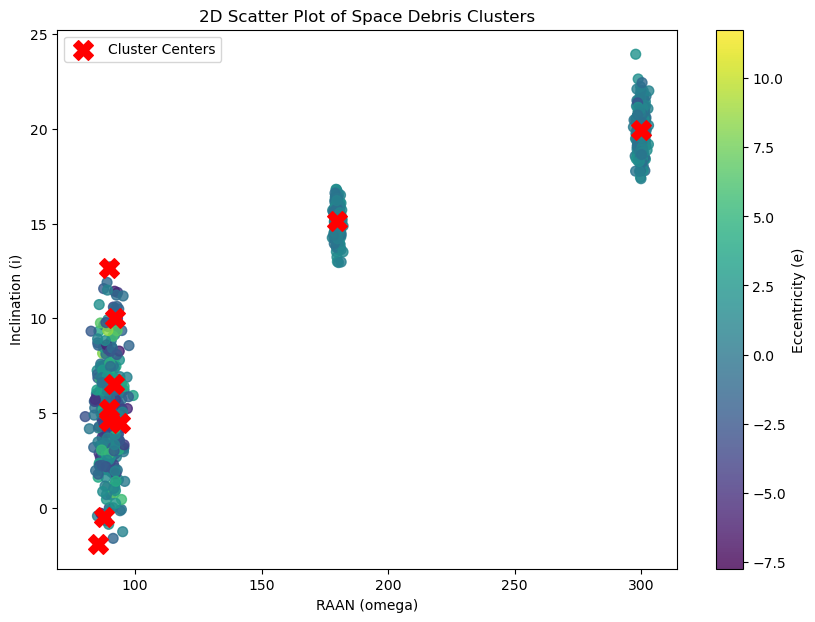

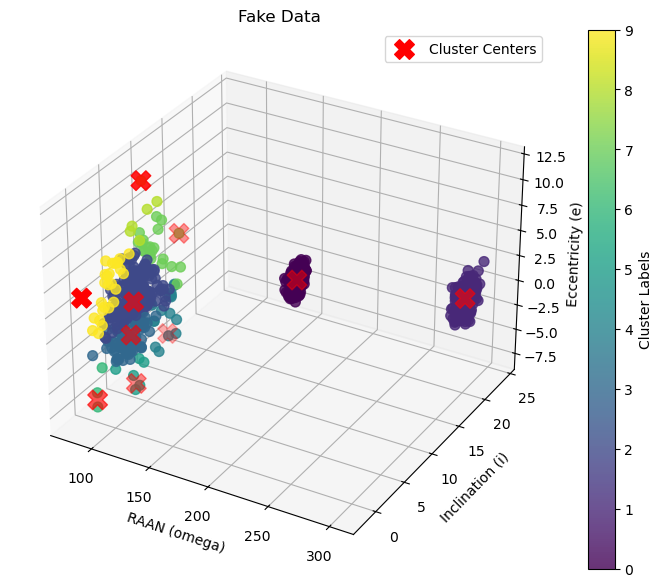

In [8]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

#https://www.geeksforgeeks.org/ml-mean-shift-clustering/

#generate fake data with three main clusters
cluster_centers = [
    [5, 90, 0.2],    
    [15, 180, 0.7],  
    [20, 300, 0.4]   
]
cluster_std = [3, 0.7, 1]  # standard deviation for each feature

data, _ = make_blobs(n_samples=1000, centers=cluster_centers, cluster_std=cluster_std, random_state=42)

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Apply Mean Shift clustering
mean_shift = MeanShift(bandwidth=0.1) 
mean_shift.fit(normalized_data)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
original_scale_centers = scaler.inverse_transform(cluster_centers)

print("Cluster labels:", labels)
print("Cluster centers (original scale):", original_scale_centers)

# 2D Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(data[:, 1], data[:, 0], c=data[:, 2], cmap='viridis', s=50, alpha=0.8)
plt.scatter(original_scale_centers[:, 1], original_scale_centers[:, 0], 
            c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('RAAN (omega)')
plt.ylabel('Inclination (i)')
plt.title('2D Scatter Plot of Space Debris Clusters')
plt.colorbar(scatter, label='Eccentricity (e)')
plt.legend()
plt.show()

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data[:, 1], data[:, 0], data[:, 2], c=labels, cmap='viridis', s=50, alpha=0.8)
ax.scatter(original_scale_centers[:, 1], original_scale_centers[:, 0], original_scale_centers[:, 2], 
           c='red', marker='X', s=200, label='Cluster Centers')
ax.set_xlabel('RAAN (omega)')
ax.set_ylabel('Inclination (i)')
ax.set_zlabel('Eccentricity (e)')
ax.set_title('Fake Data')
fig.colorbar(scatter, ax=ax, label='Cluster Labels')
ax.legend()
plt.show()